In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

In [8]:
data = pd.read_csv('Student_performance_data _.csv')
print(data.describe())

         StudentID          Age       Gender    Ethnicity  ParentalEducation  \
count  2392.000000  2392.000000  2392.000000  2392.000000        2392.000000   
mean   2196.500000    16.468645     0.510870     0.877508           1.746237   
std     690.655244     1.123798     0.499986     1.028476           1.000411   
min    1001.000000    15.000000     0.000000     0.000000           0.000000   
25%    1598.750000    15.000000     0.000000     0.000000           1.000000   
50%    2196.500000    16.000000     1.000000     0.000000           2.000000   
75%    2794.250000    17.000000     1.000000     2.000000           2.000000   
max    3392.000000    18.000000     1.000000     3.000000           4.000000   

       StudyTimeWeekly     Absences     Tutoring  ParentalSupport  \
count      2392.000000  2392.000000  2392.000000      2392.000000   
mean          9.771992    14.541388     0.301421         2.122074   
std           5.652774     8.467417     0.458971         1.122813   
min

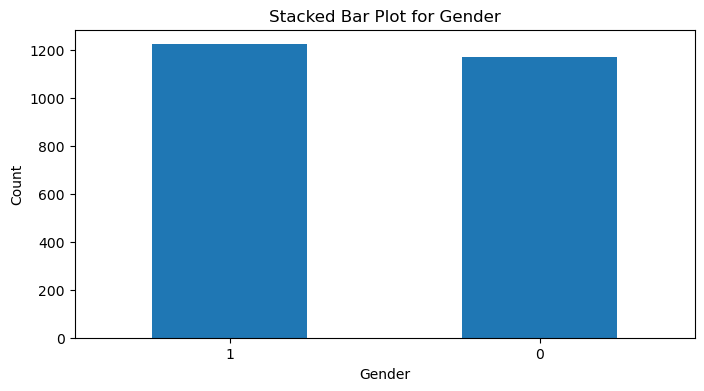

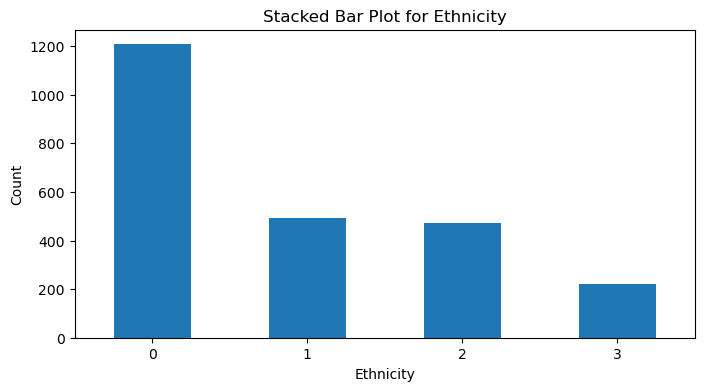

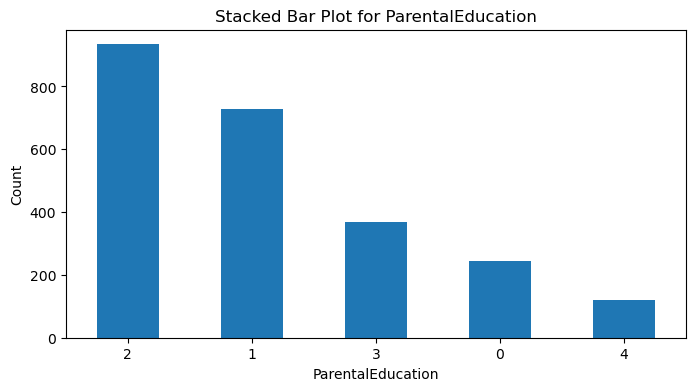

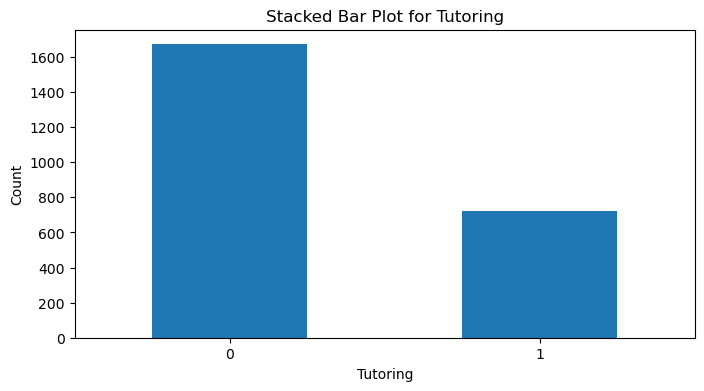

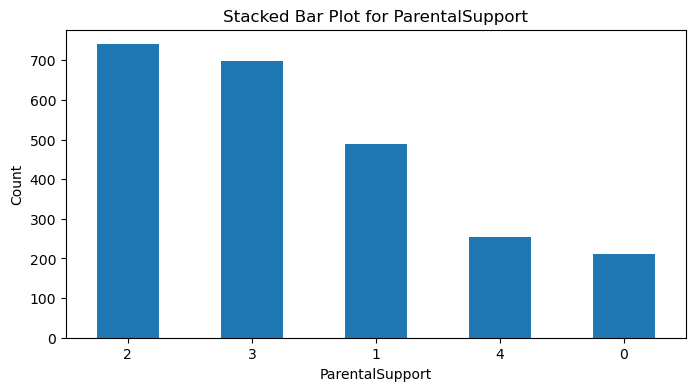

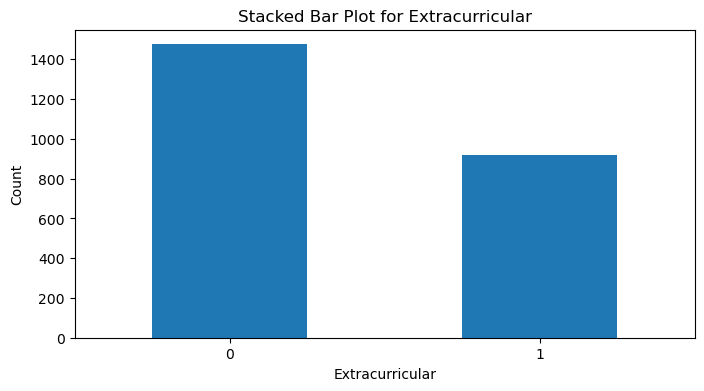

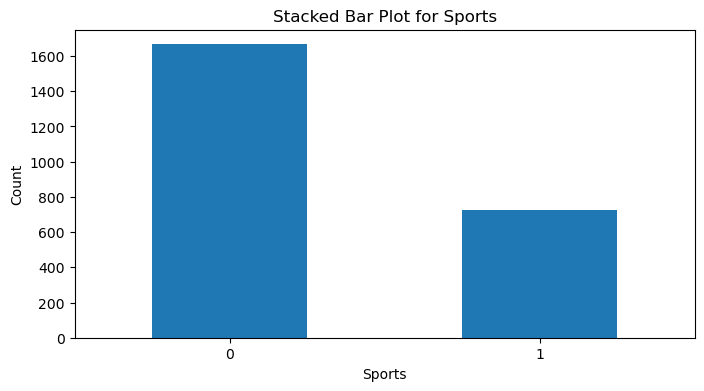

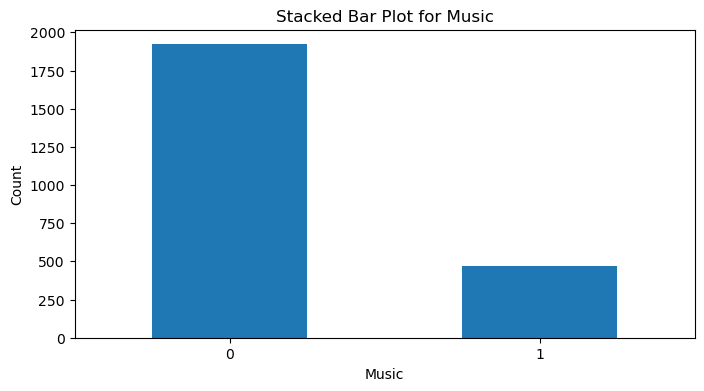

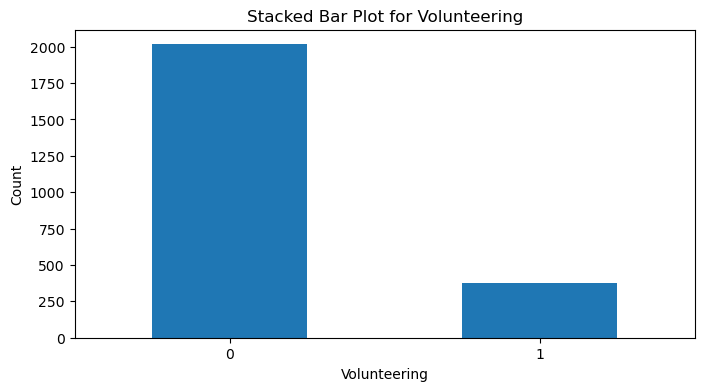

In [10]:
features = ['Gender', 'Ethnicity', 'ParentalEducation', 'Tutoring', 
            'ParentalSupport', 'Extracurricular', 'Sports', 'Music', 'Volunteering']
for feature in features:
    plt.figure(figsize=(8, 4))
    data[feature].value_counts().plot(kind='bar')
    plt.title(f'Stacked Bar Plot for {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=0)
    plt.show()

RandomForestClassifier()

In [14]:

X = data.drop(['StudentID', 'GPA', 'GradeClass'], axis=1)
y = data['GradeClass']
X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print('Accuracy:', accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.6951983298538622
              precision    recall  f1-score   support

         0.0       0.80      0.18      0.30        22
         1.0       0.52      0.55      0.53        49
         2.0       0.52      0.55      0.54        85
         3.0       0.49      0.41      0.45        86
         4.0       0.84      0.93      0.88       237

    accuracy                           0.70       479
   macro avg       0.64      0.52      0.54       479
weighted avg       0.69      0.70      0.68       479



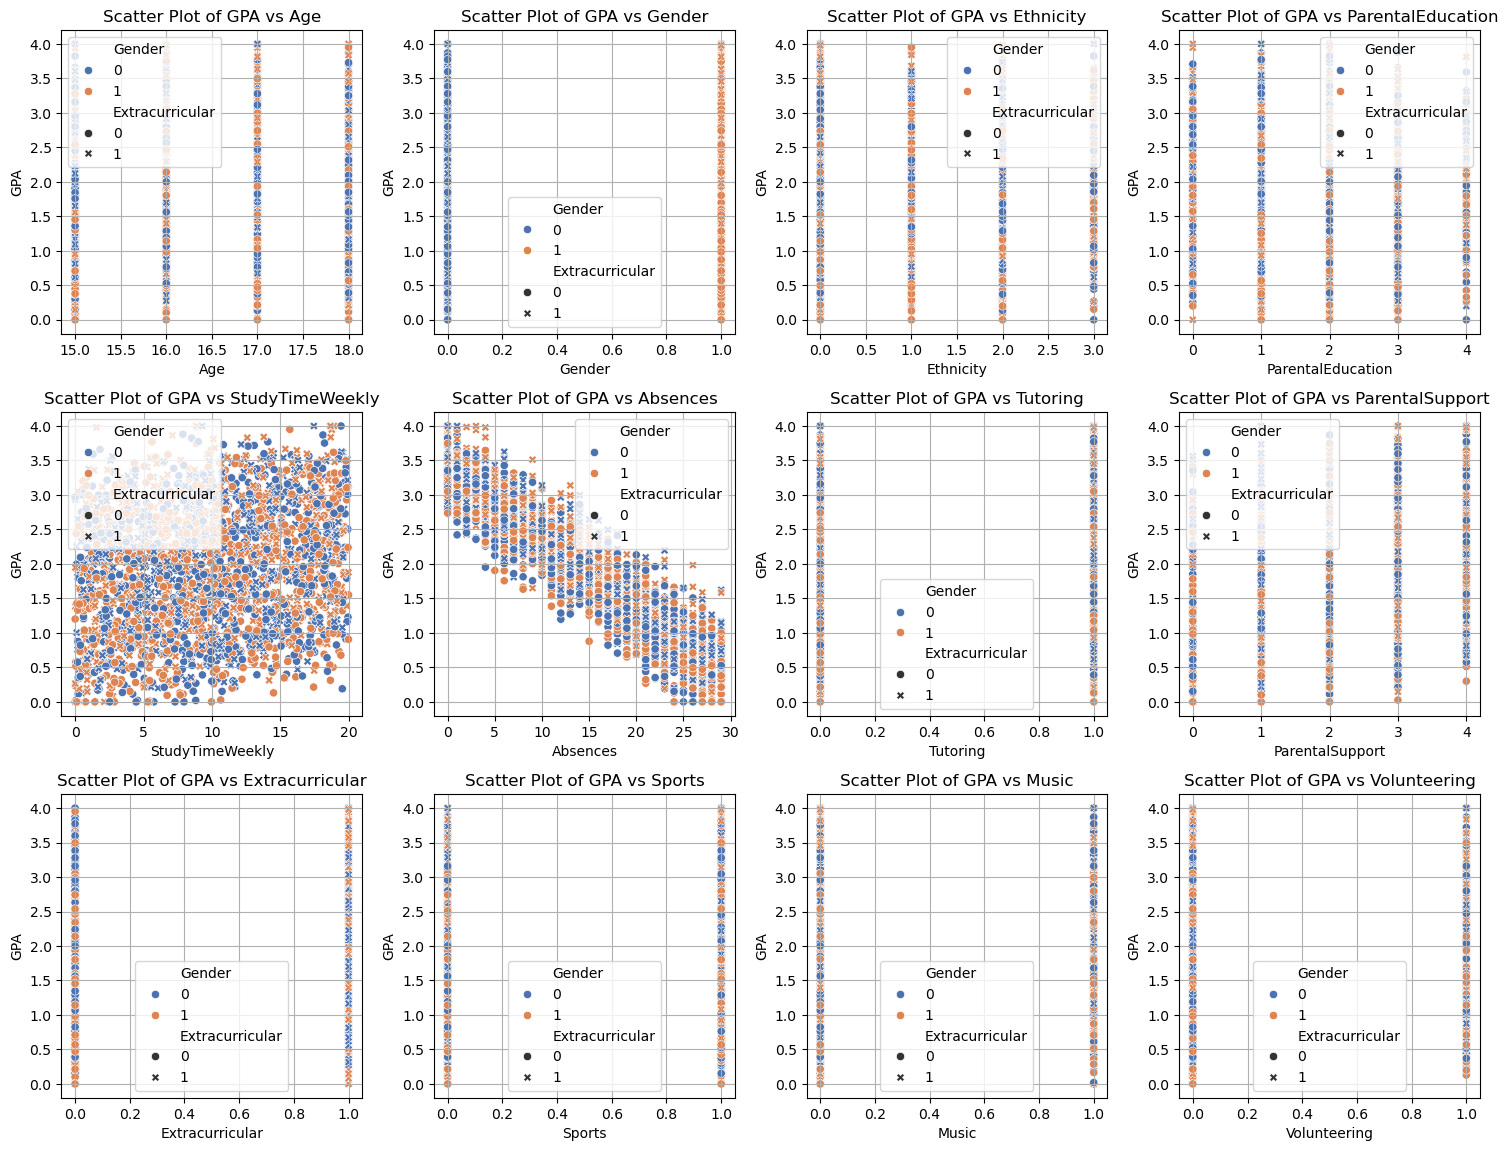

In [29]:

data = pd.read_csv('Student_performance_data _.csv')

target_variable = 'GPA'

independent_vars = data.columns.drop(['StudentID', target_variable, 'GradeClass'])

plt.figure(figsize=(15, 15))

for i, var in enumerate(independent_vars):
    plt.subplot(4, 4, i + 1)  # Tạo lưới 4x4
    sns.scatterplot(data=data, x=var, y=target_variable, hue='Gender', style='Extracurricular', palette='deep')
    plt.title(f'Scatter Plot of {target_variable} vs {var}')
    plt.xlabel(var)
    plt.ylabel(target_variable)
    plt.grid(True)

plt.tight_layout()
plt.show()

Cross-validation scores: [0.72651357 0.74530271 0.72594142 0.72175732 0.57531381]
Mean CV score: 0.6989657672452197
